In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Student_Marks.csv')
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [3]:
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [8]:
df.rename(columns={'Marks': 'Score', 'time_study' : 'Hours Studying'}, inplace=True)
df

,number_courses,Hours Studying,Score
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


Text(0.5, 1.0, 'Marks per hours studied')

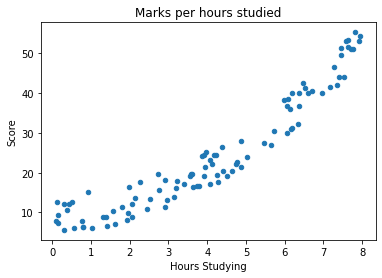

In [9]:
df.plot.scatter(x='Hours Studying', y='Score')
plt.title('Marks per hours studied')

<AxesSubplot:xlabel='number_courses', ylabel='Hours Studying'>

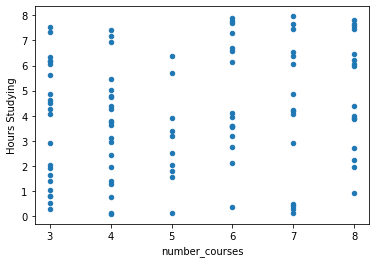

In [10]:
df.plot.scatter(x='number_courses', y='Hours Studying')

Text(0, 0.5, 'Score')

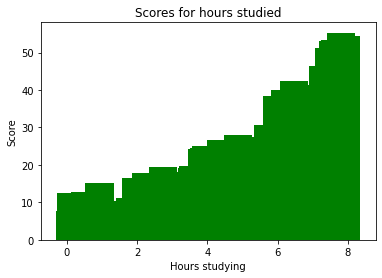

In [11]:
plt.bar(df['Hours Studying'], df['Score'], color='g')
plt.title('Scores for hours studied')
plt.xlabel('Hours studying')
plt.ylabel('Score')

## Google Sheets

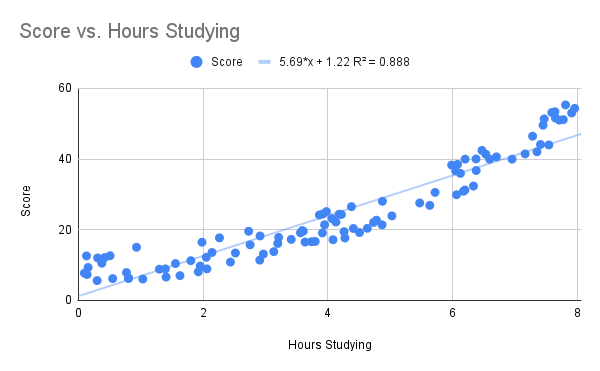

In [12]:
from IPython import display
display.Image("./Score vs. Hours Studying.png")

1. What the are the key insights of the regression analysis? I discovered from the regression analysis that the hours studied had an effect on the test scores. The more the students studied the higher their test scores were. 
2. The R^2 value is 0.888
3. Does the relationship seem linear or could it be better explained by another type of curve? The relationship is linear and is close to an R^2 value of 0.9 which shows a high level of correlation.

## Regression using pandas

In [14]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\molly\Desktop\devMountain\specializations\week-12\regression-project\regression-project\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [15]:
import statsmodels.api as sm

C:\Users\molly\Desktop\devMountain\specializations\week-12\regression-project\regression-project\env\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [16]:
pip install sklearn

You should consider upgrading via the 'C:\Users\molly\Desktop\devMountain\specializations\week-12\regression-project\regression-project\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [17]:
from sklearn import datasets

In [18]:
X = df['Hours Studying']
y = df['Score']

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              3317.
Date:                Wed, 02 Feb 2022   Prob (F-statistic):                    6.05e-78
Time:                        14:43:14   Log-Likelihood:                         -299.03
No. Observations:                 100   AIC:                                      600.1
Df Residuals:                      99   BIC:                                      602.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Hours Studying     5.9135      0.103     57.597      0.000       5.710       6.117
==============================================================================
Omnibus:                        5.417   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                4.063
Skew:                           0.366   Prob(JB):                        0.131
Kurtosis:                       2.337   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
from sklearn import linear_model

In [20]:
X = df
y = df['Score']

In [22]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [29]:
predictions = lm.predict(X)
print(predictions)[0:5]

[19.202  7.734 13.811 53.018 55.299 17.822 29.889 17.264 20.348 30.862
 42.036 12.132 24.318 17.672 11.397 19.466 30.548 38.49  50.986 25.133
 22.073 35.939 12.209 28.043 16.517  6.623 12.647 26.532  9.333  8.837
 24.172  8.1   15.038 39.965 17.171 43.978 13.119 46.453 41.358 51.142
  7.336 15.725 19.771 10.429  9.742  8.924 16.703 22.701 26.882 19.106
 40.602 22.184  7.892 36.653 53.158 18.238 53.359 51.583 31.236 51.343
 10.522 10.844 19.59  21.379 12.591 13.562 27.569  6.185  8.92  21.4
 16.606 13.416 20.398  7.014 39.952  6.217 36.746 38.278 49.544  6.349
 54.321 17.705 44.099 16.106 16.461 39.957 23.149  6.053 11.253 40.024
 24.394 19.564 23.916 42.426 24.451 19.128  5.609 41.444 12.027 32.357]


TypeError: 'NoneType' object is not subscriptable

In [24]:
lm.score(X,y)

1.0

In [25]:
lm.coef_

array([1.87262504e-15, 8.88178420e-16, 1.00000000e+00])

In [26]:
lm.intercept_

7.105427357601002e-15

### Conclusion

There were no null values in the dataset so the graphs and regressions should not be influenced. I have a high confidence level that the more hours studying, the higher the test score will be based on the scatter plots, linear regression, and R^2 value. If I were to conduct a multiple regression on the same data set I would use the number_courses variable to see if the number of courses influenced either the hours studied or the overall test score. 